In [ ]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import networkx as nx
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
df=pd.read_csv("/content/games.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1110 non-null   int64  
 1   Title              1110 non-null   object 
 2   Release Date       1110 non-null   object 
 3   Team               1110 non-null   object 
 4   Rating             1103 non-null   float64
 5   Times Listed       1110 non-null   object 
 6   Number of Reviews  1110 non-null   object 
 7   Genres             1110 non-null   object 
 8   Summary            1109 non-null   object 
 9   Reviews            1110 non-null   object 
 10  Plays              1110 non-null   object 
 11  Playing            1110 non-null   object 
 12  Backlogs           1110 non-null   object 
 13  Wishlist           1110 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 121.5+ KB


In [ ]:
df.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [ ]:
df.describe()

,Unnamed: 0,Rating
count,1110.000000,1103.000000
mean,554.500000,3.811967
std,320.573704,0.484274
min,0.000000,1.200000
25%,277.250000,3.600000
50%,554.500000,3.900000
75%,831.750000,4.200000
max,1109.000000,4.600000


In [ ]:
df.shape

(1110, 14)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist'],
      dtype='object')

In [ ]:
# Lets replace "K" Sign of  Times Listed with the empty string
df['Times Listed']=df['Times Listed'].apply(lambda x:x.replace("K","")if "K" in str(x) else x)
# Lets Apply the lambda function to convert float to int
df['Times Listed']=df['Times Listed'].apply(lambda x: int(round(float(x))))


In [ ]:
# Summary Statistics
df.describe()

,Unnamed: 0,Rating,Times Listed
count,1110.000000,1103.000000,1110.000000
mean,554.500000,3.811967,368.591892
std,320.573704,0.484274,326.916203
min,0.000000,1.200000,1.000000
25%,277.250000,3.600000,2.000000
50%,554.500000,3.900000,386.000000
75%,831.750000,4.200000,643.000000
max,1109.000000,4.600000,995.000000


In [ ]:
# Lets replace "K" with the empty string
df['Number of Reviews']=df['Number of Reviews'].apply(lambda x:x.replace("K","")if "K" in str(x) else x)
# Lets Apply the lambda function to convert float to int
df['Number of Reviews']=df['Number of Reviews'].apply(lambda x: int(round(float(x))))

In [ ]:
df.describe()

,Unnamed: 0,Rating,Times Listed,Number of Reviews
count,1110.000000,1103.000000,1110.000000,1110.000000
mean,554.500000,3.811967,368.591892,368.591892
std,320.573704,0.484274,326.916203,326.916203
min,0.000000,1.200000,1.000000,1.000000
25%,277.250000,3.600000,2.000000,2.000000
50%,554.500000,3.900000,386.000000,386.000000
75%,831.750000,4.200000,643.000000,643.000000
max,1109.000000,4.600000,995.000000,995.000000


In [ ]:
# Lets replace "K" with the empty string
df['Plays']=df['Plays'].apply(lambda x:x.replace("K","")if "K" in str(x) else x)
# Lets Apply the lambda function to convert float to int
df['Plays']=df['Plays'].apply(lambda x: int(round(float(x))))


In [ ]:
df.describe()

,Unnamed: 0,Rating,Times Listed,Number of Reviews,Plays
count,1110.000000,1103.000000,1110.000000,1110.000000,1110.000000
mean,554.500000,3.811967,368.591892,368.591892,35.385586
std,320.573704,0.484274,326.916203,326.916203,124.777446
min,0.000000,1.200000,1.000000,1.000000,1.000000
25%,277.250000,3.600000,2.000000,2.000000,4.000000
50%,554.500000,3.900000,386.000000,386.000000,7.000000
75%,831.750000,4.200000,643.000000,643.000000,13.000000
max,1109.000000,4.600000,995.000000,995.000000,984.000000


In [ ]:
# Lets replace "K" with the empty string
df['Playing']=df['Playing'].apply(lambda x:x.replace("K","")if"K" in str(x) else x)
# Lets Apply the lambda function to convert float to int
df['Playing']=df['Playing'].apply(lambda x: int(round(float(x))))


In [ ]:
df.describe()

,Unnamed: 0,Rating,Times Listed,Number of Reviews,Plays,Playing
count,1110.000000,1103.000000,1110.000000,1110.000000,1110.000000,1110.000000
mean,554.500000,3.811967,368.591892,368.591892,35.385586,222.131532
std,320.573704,0.484274,326.916203,326.916203,124.777446,222.170080
min,0.000000,1.200000,1.000000,1.000000,1.000000,0.000000
25%,277.250000,3.600000,2.000000,2.000000,4.000000,60.000000
50%,554.500000,3.900000,386.000000,386.000000,7.000000,140.000000
75%,831.750000,4.200000,643.000000,643.000000,13.000000,311.750000
max,1109.000000,4.600000,995.000000,995.000000,984.000000,999.000000


In [ ]:
# Lets replace "K" with the empty string
df['Backlogs']=df['Backlogs'].apply(lambda x:x.replace("K","")if"K" in str(x) else x)
# Lets Apply the lambda function to convert float to int
df['Backlogs']=df['Backlogs'].apply(lambda x: int(round(float(x))))

In [ ]:
df.describe()

,Unnamed: 0,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs
count,1110.000000,1103.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000
mean,554.500000,3.811967,368.591892,368.591892,35.385586,222.131532,196.179279
std,320.573704,0.484274,326.916203,326.916203,124.777446,222.170080,305.867604
min,0.000000,1.200000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,277.250000,3.600000,2.000000,2.000000,4.000000,60.000000,2.000000
50%,554.500000,3.900000,386.000000,386.000000,7.000000,140.000000,3.000000
75%,831.750000,4.200000,643.000000,643.000000,13.000000,311.750000,387.250000
max,1109.000000,4.600000,995.000000,995.000000,984.000000,999.000000,999.000000


In [ ]:
# Lets replace "K" with the empty string
df['Wishlist']=df['Wishlist'].apply(lambda x: x.replace("K", "")if "K" in str(x) else x)
# Lets Apply the lambda function to convert float to int
df['Wishlist']=df['Wishlist'].apply(lambda x: int(round(float(x))))

In [ ]:
df.describe()

,Unnamed: 0,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist
count,1110.000000,1103.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000
mean,554.500000,3.811967,368.591892,368.591892,35.385586,222.131532,196.179279,296.731532
std,320.573704,0.484274,326.916203,326.916203,124.777446,222.170080,305.867604,302.950275
min,0.000000,1.200000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,277.250000,3.600000,2.000000,2.000000,4.000000,60.000000,2.000000,2.000000
50%,554.500000,3.900000,386.000000,386.000000,7.000000,140.000000,3.000000,216.500000
75%,831.750000,4.200000,643.000000,643.000000,13.000000,311.750000,387.250000,526.750000
max,1109.000000,4.600000,995.000000,995.000000,984.000000,999.000000,999.000000,995.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1110 non-null   int64  
 1   Title              1110 non-null   object 
 2   Release Date       1110 non-null   object 
 3   Team               1110 non-null   object 
 4   Rating             1103 non-null   float64
 5   Times Listed       1110 non-null   int64  
 6   Number of Reviews  1110 non-null   int64  
 7   Genres             1110 non-null   object 
 8   Summary            1109 non-null   object 
 9   Reviews            1110 non-null   object 
 10  Plays              1110 non-null   int64  
 11  Playing            1110 non-null   int64  
 12  Backlogs           1110 non-null   int64  
 13  Wishlist           1110 non-null   int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 121.5+ KB


In [ ]:
# Missing values
missing_values=df.isnull().sum().sort_values(ascending=False)
missing_values

Rating               7
Summary              1
Unnamed: 0           0
Title                0
Release Date         0
Team                 0
Times Listed         0
Number of Reviews    0
Genres               0
Reviews              0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
dtype: int64

In [ ]:
df['Rating'].fillna(df['Rating'].mode()[0], inplace=True)
df['Rating'].isnull().sum()

0

In [ ]:
df['Team'].fillna(df['Team'].mode()[0], inplace=True)
df['Team'].isnull().sum()

0

In [ ]:
df['Summary'].fillna(df['Summary'].mode()[0], inplace=True)
df['Summary'].isnull().sum()

0

In [ ]:
df.isnull().sum().sort_values(ascending=True)

Unnamed: 0           0
Title                0
Release Date         0
Team                 0
Rating               0
Times Listed         0
Number of Reviews    0
Genres               0
Summary              0
Reviews              0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
dtype: int64

In [ ]:
df.dropna()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,4,4,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17,4,5,5
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,3,3,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21,3,6,4
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4,4,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30,2,5,3
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,4,4,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28,679,5,2
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3,3,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21,2,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,1105,Saints Row IV,"Aug 19, 2013","['Volition', 'Deep Silver']",3.1,386,386,"['Adventure', 'Shooter']","Unlike the first three games in the franchise,...","['infamous at home:', ""Finally got back to fin...",7,64,775,176
1106,1106,Fallout 2,"Oct 29, 1998","['Black Isle Studios', 'Interplay Entertainment']",4.1,532,532,"['RPG', 'Turn Based Strategy']",A turn-based tactical Western RPG in which the...,"[""The nukes destroying the world were a blessi...",2,72,2,493
1107,1107,Chrono Cross,"Nov 18, 1999",['Square'],4.0,554,554,['RPG'],"CHRONO CROSS, the sequel to the SNES favorite ...",['Chrono Cross foi um jogo que eu demorei um t...,2,60,2,768
1108,1108,Fire Emblem: Path of Radiance,"Apr 20, 2005","['Intelligent Systems Co., Ltd.', 'Nintendo']",4.2,703,703,"['RPG', 'Strategy', 'Tactical', 'Turn Based St...",Fire Emblem: Path of Radiance is a tactical ro...,"['ike and soren trump any and all ""representat...",3,155,2,716


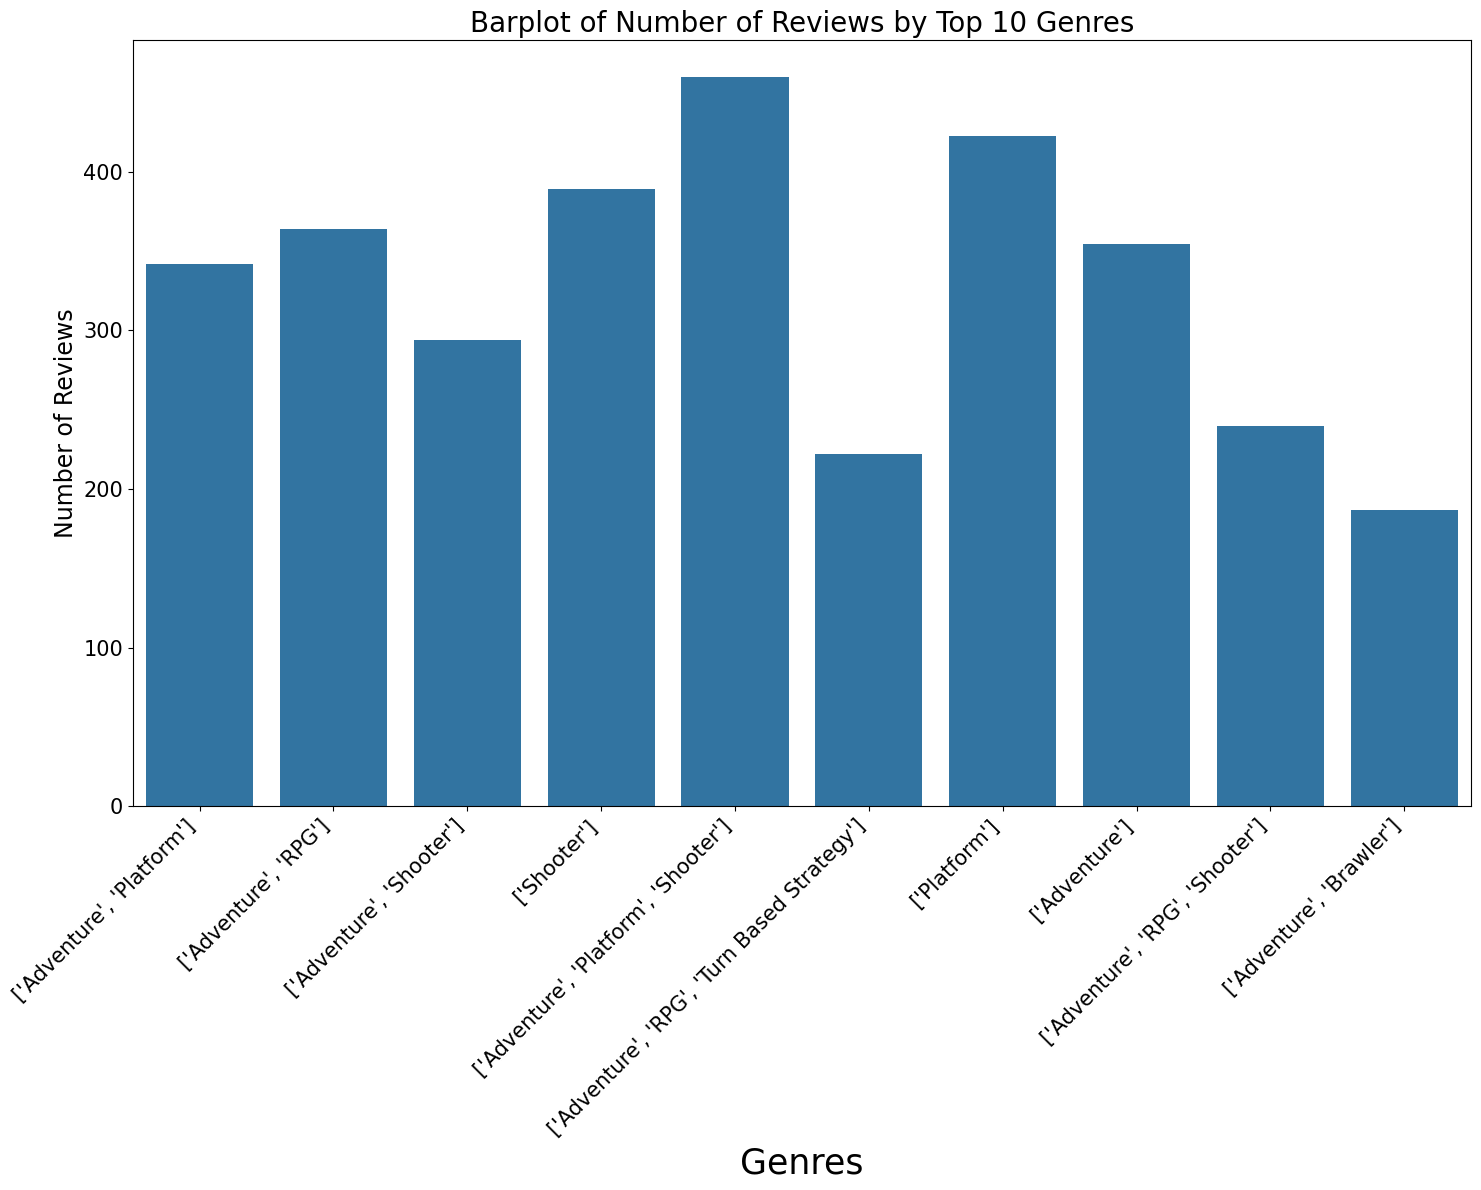

In [ ]:
# Sort the dataframe by number of reviews
df_sorted = df.sort_values(by='Number of Reviews', ascending=False)
# Select top 10 genres
N = 10
top_genres = df_sorted['Genres'].value_counts().nlargest(N).index
# Filter dataframe to include only top 10 genres
df_top_genres = df_sorted[df_sorted['Genres'].isin(top_genres)]
# Plotting
plt.figure(figsize=(15, 12))
sns.barplot(data=df_top_genres, x='Genres', y='Number of Reviews', ci=None)
plt.xlabel('Genres', fontsize=25)
plt.ylabel('Number of Reviews', fontsize=17)
plt.title('Barplot of Number of Reviews by Top {} Genres'.format(N), fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
# Save the plot
plt.savefig('barplot_top_genres.png', dpi=300, bbox_inches='tight')
plt.show()

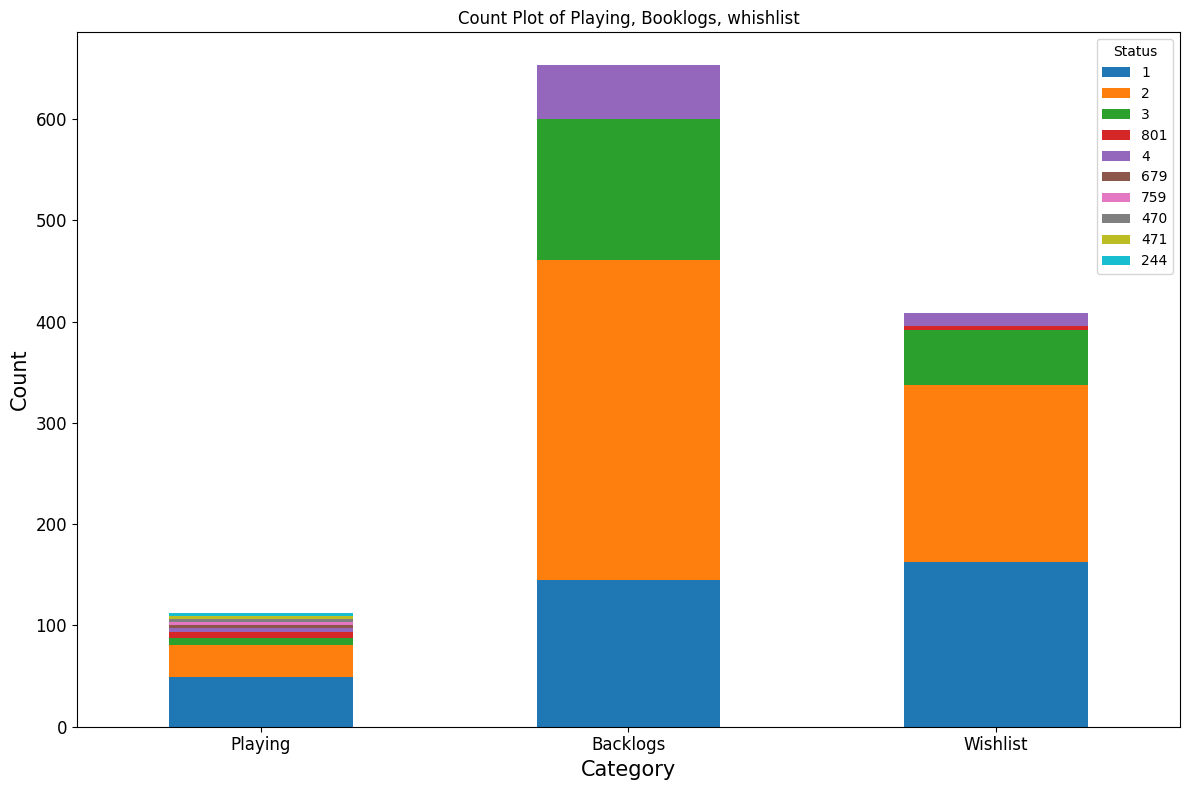

In [ ]:
#Lets Display the Stacked Barchart of Playing, Backlogs, and Wishlist Counts
# Selecting the columns
categories = ['Playing', 'Backlogs', 'Wishlist']
# Creating a DataFrame to store the counts of unique values
value_counts = pd.DataFrame()
# Selecting a subset of unique values for each category
unique_value_limit = 10
for category in categories:
    unique_values = df[category].unique()[:unique_value_limit]  # Select a subset of unique values
    value_counts[category] = df[df[category].isin(unique_values)][category].value_counts()
# Transposing the value_counts DataFrame
value_counts = value_counts.transpose()
# Plotting the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))
value_counts.plot(kind='bar', stacked=True, ax=ax)
# Adding labels and title
plt.title('Count Plot of Playing, Booklogs, whishlist')
plt.xlabel('Category', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
# Show plot
plt.legend(title='Status')
plt.tight_layout()
plt.show()

In [ ]:
#Lets visualize the scatter plot of Playing vs Number of Reviews by Team
fig=px.scatter(df, x='Number of Reviews', y='Playing', color='Team')
fig.show()

In [ ]:
# Sort the dataframe by the 'Number of Reviews' column
df_sorted = df.sort_values(by='Number of Reviews', ascending=False)

# Define the number of top titles to display
top_n = 10
# Select the top N titles with the highest number of reviews
df1_top = df_sorted.head(top_n)
# Create a list of colors for each bar
colors = px.colors.qualitative.Pastel
# Create a vertical bar chart
fig = px.bar(df1_top,
             x='Title',
             y='Number of Reviews',
             title=f'Top {top_n} Titles by Number of Reviews',
             labels={'Number of Reviews': 'Number of Reviews'},
             color=df1_top.index,
             color_discrete_sequence=colors)
# Customize layout
fig.update_layout(
    xaxis_title='Title',  # Adjust axis labels
    yaxis_title='Number of Reviews',  # Adjust axis labels
    xaxis={'categoryorder': 'total ascending'},  # Ensure correct order of titles
    width=1000,
    height=700,  # Adjusted height for better visibility
    bargap=0.2,
)
# Show plot
fig.show()



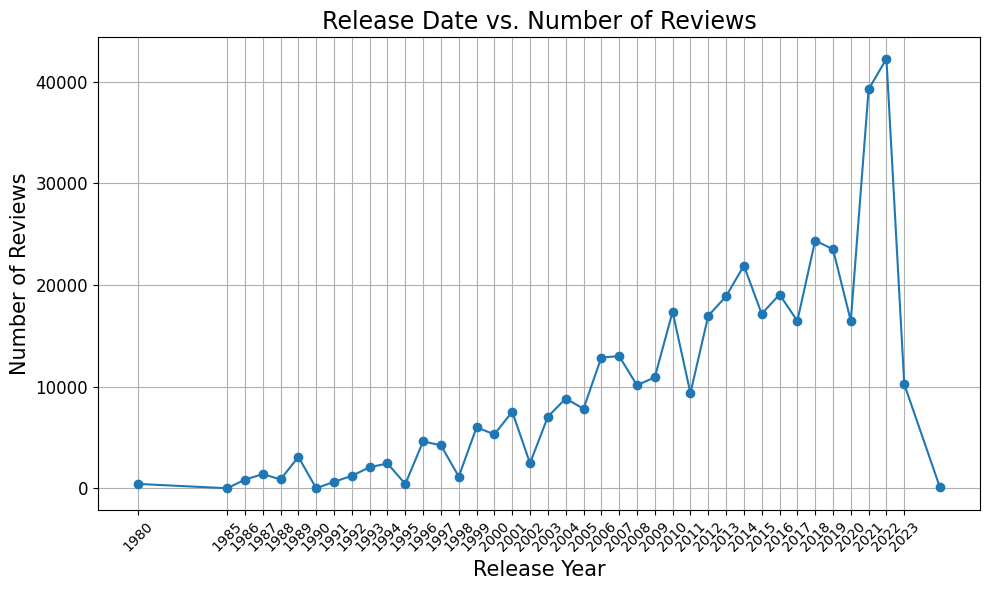

In [ ]:
##Lets Display the Release Date Of Games vs Number of Reviews
df = df[df['Release Date'] != 'releases on TBD']
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Release Year'] = df['Release Date'].dt.year
reviews_by_year = df.groupby('Release Year')['Number of Reviews'].sum().reset_index()
valid_years = df['Release Year'].unique()
reviews_by_year = reviews_by_year[reviews_by_year['Release Year'].isin(valid_years)]
valid_years = valid_years[(valid_years >= 1980) & (valid_years <= 2023)]
plt.figure(figsize=(10, 6))
plt.plot(reviews_by_year['Release Year'], reviews_by_year['Number of Reviews'], marker='o', linestyle='-')
plt.title('Release Date vs. Number of Reviews', fontsize=17)
plt.xlabel('Release Year', fontsize=15)
plt.ylabel('Number of Reviews', fontsize=15)
plt.grid(True)
plt.xticks(valid_years, rotation=45, fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

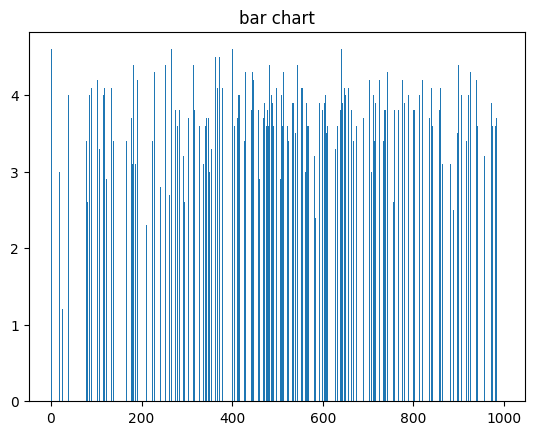

In [ ]:
import matplotlib.pyplot as plt
plt.bar(df["Number of Reviews"],df["Rating"])
plt.title("bar chart")
plt.show()

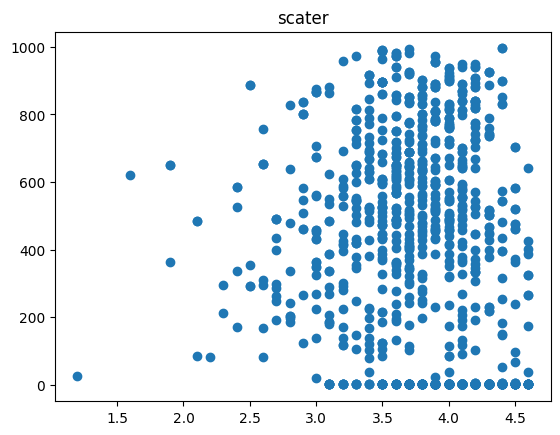

In [ ]:
plt.scatter(df["Rating"],df["Number of Reviews"])
plt.title("scater")
plt.show()

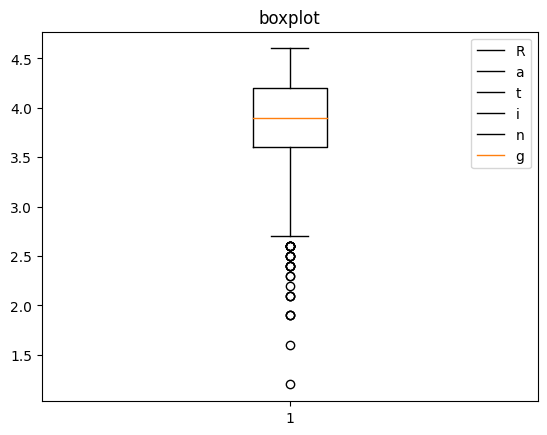

In [ ]:
plt.boxplot(df["Rating"])
plt.title("boxplot")
plt.legend("Rating")
plt.show()

In [ ]:
#statistics
st.mean(df["Rating"])

3.813086642599278

In [ ]:
st.median(df["Rating"])

3.9

In [ ]:
st.mode(df["Rating"])

4.1

In [ ]:
X=max(df["Rating"])
Y=min(df["Rating"])
Range=X-Y
print(Range)

3.3999999999999995


In [ ]:
df

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,Release Year
0,0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,4,4,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17,4,5,5,2022
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,3,3,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21,3,6,4,2019
2,2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4,4,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30,2,5,3,2017
3,3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,4,4,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28,679,5,2,2015
4,4,Hollow Knight,2017-02-24,['Team Cherry'],4.4,3,3,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21,2,8,2,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,1105,Saints Row IV,2013-08-19,"['Volition', 'Deep Silver']",3.1,386,386,"['Adventure', 'Shooter']","Unlike the first three games in the franchise,...","['infamous at home:', ""Finally got back to fin...",7,64,775,176,2013
1106,1106,Fallout 2,1998-10-29,"['Black Isle Studios', 'Interplay Entertainment']",4.1,532,532,"['RPG', 'Turn Based Strategy']",A turn-based tactical Western RPG in which the...,"[""The nukes destroying the world were a blessi...",2,72,2,493,1998
1107,1107,Chrono Cross,1999-11-18,['Square'],4.0,554,554,['RPG'],"CHRONO CROSS, the sequel to the SNES favorite ...",['Chrono Cross foi um jogo que eu demorei um t...,2,60,2,768,1999
1108,1108,Fire Emblem: Path of Radiance,2005-04-20,"['Intelligent Systems Co., Ltd.', 'Nintendo']",4.2,703,703,"['RPG', 'Strategy', 'Tactical', 'Turn Based St...",Fire Emblem: Path of Radiance is a tactical ro...,"['ike and soren trump any and all ""representat...",3,155,2,716,2005


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1108 entries, 0 to 1109
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         1108 non-null   int64         
 1   Title              1108 non-null   object        
 2   Release Date       1108 non-null   datetime64[ns]
 3   Team               1108 non-null   object        
 4   Rating             1108 non-null   float64       
 5   Times Listed       1108 non-null   int64         
 6   Number of Reviews  1108 non-null   int64         
 7   Genres             1108 non-null   object        
 8   Summary            1108 non-null   object        
 9   Reviews            1108 non-null   object        
 10  Plays              1108 non-null   int64         
 11  Playing            1108 non-null   int64         
 12  Backlogs           1108 non-null   int64         
 13  Wishlist           1108 non-null   int64         
 14  Release Year 

In [ ]:
#modeling
x=df[["Times Listed","Number of Reviews","Plays","Playing","Wishlist"]]
y=df["Rating"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=32)

In [ ]:
reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on test set
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on test set
y_predicted = model.predict(x_test)

r2 = r2_score(y_test, y_predicted)
print("accuarcy", (1-r2)*100)

accuarcy 92.88226566494802


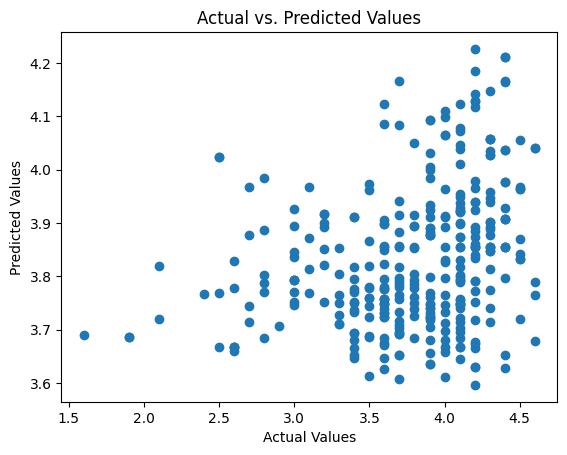

In [ ]:
#Plot the actual vs. predicted values to visually assess the model's fit.
plt.scatter(y_test, y_predicted)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

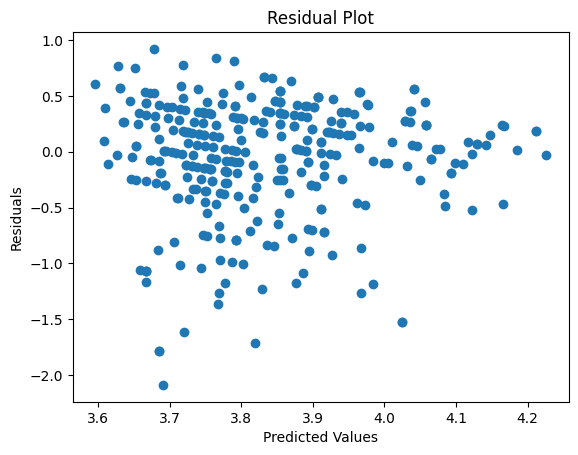

In [ ]:
# Plot the residuals (difference between actual and predicted values) vs. predicted values. Random scatter suggests no systematic errors.
plt.scatter(y_predicted, y_test - y_predicted)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

<Axes: >

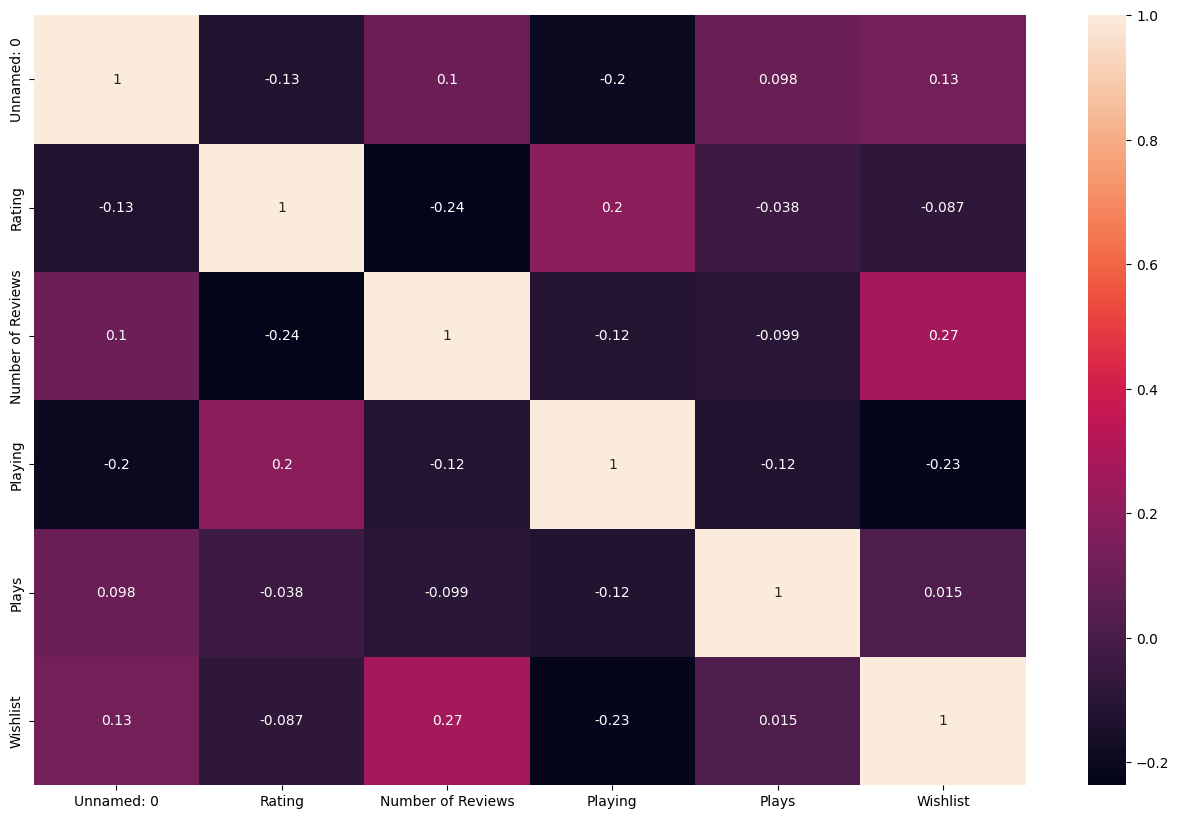

In [ ]:
# Make a correlation matrix of numeric columns
plt.figure(figsize=(16, 10))
# make a list of numeric columns
numeric_cols = ['Unnamed: 0', 'Rating', 'Number of Reviews', 'Playing', 'Plays', 'Wishlist']
sns.heatmap(df[numeric_cols].corr(), annot=True)